# Question 3 of HW4
# Shardul Dabhane

The professor enjoyed reading news that came out in late Feb on CNN, People, Science Daily and many other platforms, all about one study. The study (to be presented at the American Academy of Neurology’s 74th Annual Meeting) found that long-term pet owners had higher cognitive scores than those in the same age group without pets. The professor (a) felt that some news read suspiciously similar to each other; and (b) worried that some of the news perhaps over interpreted the results from the study (e.g., one news mentioned that “Long-Term Pet Ownership Can Slow Cognitive Decline in Older Adults”). For this problem, you are going to do some reading and coding to help the professor out.

1. Collect related news and save them as text files (.txt). (10 pts)

2. Read the news and use the concepts that you have learned this semester to either help the professor back up her worry, or convince her that her worry is baseless. (10 pts)

3. Tokenize the news so each news can be represented as a binary vector (see ref code). You may try different values for the important parameters and see how that impact the downstream applications. Apply hierarchical clustering algorithms (min, average, and max) to cluster the news using their binary vectors. Summarize what you find about the relationship of the news based on the clustering results. Does your finding support the professor’s claim that some news sound suspiciously similar to each other (just a qualitative description)? (30 points)


In [1]:
#import required modules

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline


1. Collect related news and save them as text files (.txt). (10 pts)


In [2]:
#Read all files from the folder

all_files = os.listdir("Folder_To_Read_Data/")
txt_files = filter(lambda x: x[-4:] == '.txt', all_files)
txt_files=list(txt_files)
print(txt_files)


['AAN.txt', 'CNBC.txt', 'CNN.txt', 'DailyPaws.txt', 'Healthline.txt', 'Insider.txt', 'MarthaStewart.txt', 'MedPage.txt', 'MiamiHerald.txt', 'People.txt', 'ScienceDaily.txt', 'StudyFinds.txt', 'UniversityOfFlorida.txt', 'Yahoo.txt']


2. Read the news and use the concepts that you have learned this semester to either help the professor back up her worry, or convince her that her worry is baseless. (10 pts)


The study was conducted by researchers at the University of Florida, University of Michigan and Virginia Commonwealth University. The study says that adults ages 50 or older who had owned any kind of pet for more than five years showed slower decline in verbal memory — being able to recall words, for example — over time compared to non-pet owners. While most publications ran with the headline, "Long-Term Pet Ownership Can Slow Cognitive Decline in Older Adults" or something similar, the University of Florida article about this study is more grounded and realistic. 

(Link: https://news.ufl.edu/2022/02/pet-ownership-study/#:~:text=The%20researchers%20found%20that%20adults,compared%20to%20non%2Dpet%20owners.)

I've included this article in my code as well. This article has a better headline:"Long-term pet ownership may help older adults retain cognitive skills". It also includes a quote from the lead author of the study, Jennifer Applebaum, a doctoral candidate in sociology and National Institutes of Health predoctoral Fellow at the University of Florida. The quote is, "We can’t show that this is causal but it does show that pets could buffer or have a protective effect on older adults’ cognition and we think it has to do with some of the mechanism related to stress buffering." This quote is only mentioned in 1 or 2 articles, leading to the authors of those articles concluding that owning pets will slow the cognitive decline process significantly, while the author mentions that there is no causal relationship between owning pets and slowing cognitive decline.

Another line in the article says "Applebaum said the researchers are not recommending pet ownership as a therapeutic intervention". This line is mentioned in only articles from CNN and MedPage, apart from the University of Florida article. Both these important lines indicate that further study needs to be done to conclude that owning pets will slower cognitive decline. 
Most of the articles do not contain this important information, so it is understandable that the professor worries that the news has overinterpreted the results. 

3. Tokenize the news so each news can be represented as a binary vector (see ref code). You may try different values for the important parameters and see how that impact the downstream applications. Apply hierarchical clustering algorithms (min, average, and max) to cluster the news using their binary vectors. Summarize what you find about the relationship of the news based on the clustering results. Does your finding support the professor’s claim that some news sound suspiciously similar to each other (just a qualitative description)? (30 points)

In [3]:
#Collect content from all news items into one array
corpus_for_content=[]
for txt in txt_files:
    file = open(txt, 'r',encoding="utf8")
    file_content=file.read()
    file_content=file_content.strip()
    corpus_for_content.append(file_content)
print(len(corpus_for_content))

14


In [4]:
#Create binary vectors based on the data

vectorizer = CountVectorizer(stop_words='english', ngram_range=(3, 3), min_df=2)
X = vectorizer.fit_transform(corpus_for_content)
words = vectorizer.get_feature_names()
Y=X.toarray()
print(Y.shape)
print(Y)

(14, 602)
[[0 1 1 ... 1 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]]


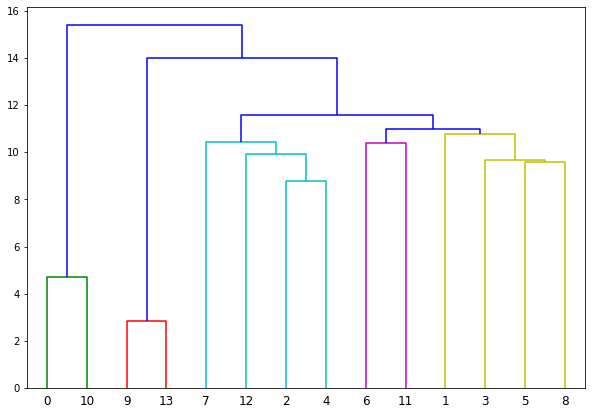

In [5]:
#min clustering algorithm
plt.figure(figsize=(10, 7))
dendrogram(linkage(Y, 'single'),orientation='top')
plt.show()

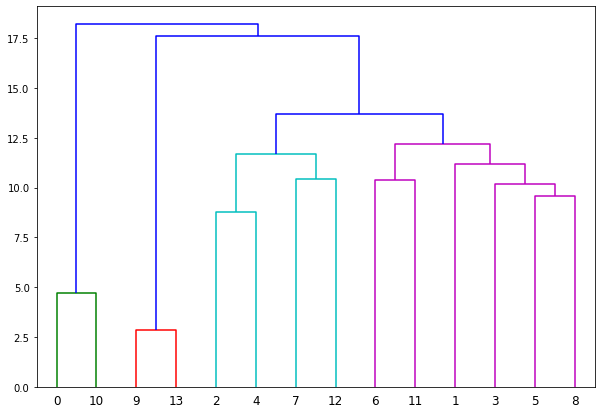

In [6]:
#average clustering algorithm
plt.figure(figsize=(10, 7))
dendrogram(linkage(Y, 'average'),orientation='top')
plt.show()

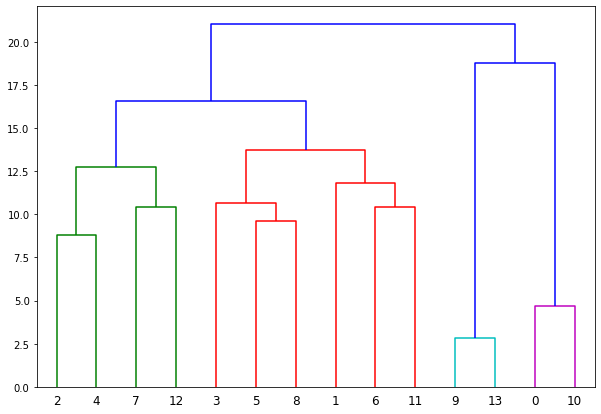

In [7]:
#max clustering algorithm
plt.figure(figsize=(10, 7))
dendrogram(linkage(Y, 'complete'),orientation='top')
plt.show()

I ran the code with different values of ngram_range and min_df and the results were similar. Based on the above dendrograms, we can see that there is not much separation between the articles. Articles from People and Yahoo are really similar and have the least difference between them. The article on Yahoo is quoting the People article so it makes sense that these 2 will be clustered first. Then articles from AAN and Science Daily are the most similar. Then Martha Stewart and Study Finds are most similar, and so on. The maximum distance between any 2 clusters is only just above 20. This indicates that the news is suspiciously similar. As mentioned in the answer for 2, the news is interpreting the results wrongly even though the actual study shows no causal link between slower cognitive decline and owning pets.The professor's findings are accurate in this case. 

# References:
    
[1] Introduction to Data Mining 2nd Edition By Tan, Steinbach, Kumar,
Karpatne

[2] https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.complete.html

[3] https://www.kaggle.com/code/morecoding/omicron-nlp

[4] https://www.kaggle.com/code/morecoding/clustering-basic

[5] https://www.kaggle.com/code/morecoding/hierarchical-clustering/

[6] https://stackoverflow.com/questions/35672809/how-to-read-a-list-of-txt-files-in-a-folder-in-python